<a href="https://colab.research.google.com/github/Hemavathi22-HV/Hemavathi22-HV/blob/main/day_9assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training model with configuration: {'hidden_layers': 1, 'units_per_layer': 128, 'activation': 'relu'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7858 - loss: 0.6240 - val_accuracy: 0.8382 - val_loss: 0.4665
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8613 - loss: 0.3887 - val_accuracy: 0.8538 - val_loss: 0.4057
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8765 - loss: 0.3421 - val_accuracy: 0.8666 - val_loss: 0.3734
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8867 - loss: 0.3135 - val_accuracy: 0.8740 - val_loss: 0.3557
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8930 - loss: 0.2922 - val_accuracy: 0.8754 - val_loss: 0.3521
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8987 - loss: 0.2751 - val_accuracy: 0.8715 - val_loss: 0.3594
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9011 - loss: 0.2668 - val_accuracy: 0.8754 - val_loss: 0.3615
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9053 - loss: 0.2595

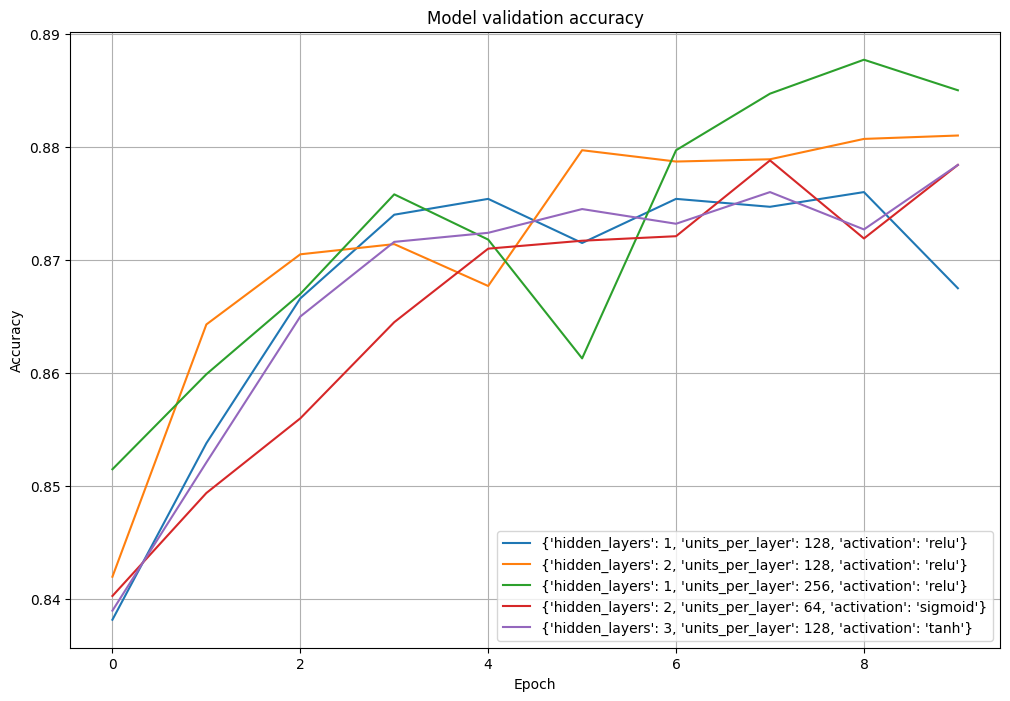


Best configuration: {'hidden_layers': 1, 'units_per_layer': 256, 'activation': 'relu'}
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7841 - loss: 0.6124
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8617 - loss: 0.3804
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8777 - loss: 0.3302
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8879 - loss: 0.3059
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8954 - loss: 0.2818
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8989 - loss: 0.2723
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9017 - loss: 0.2611
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9087 - loss: 0.2442
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9112 - loss: 0.2357
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9157 - loss: 0.2239
313/313 - 1s - 2ms/step - ac

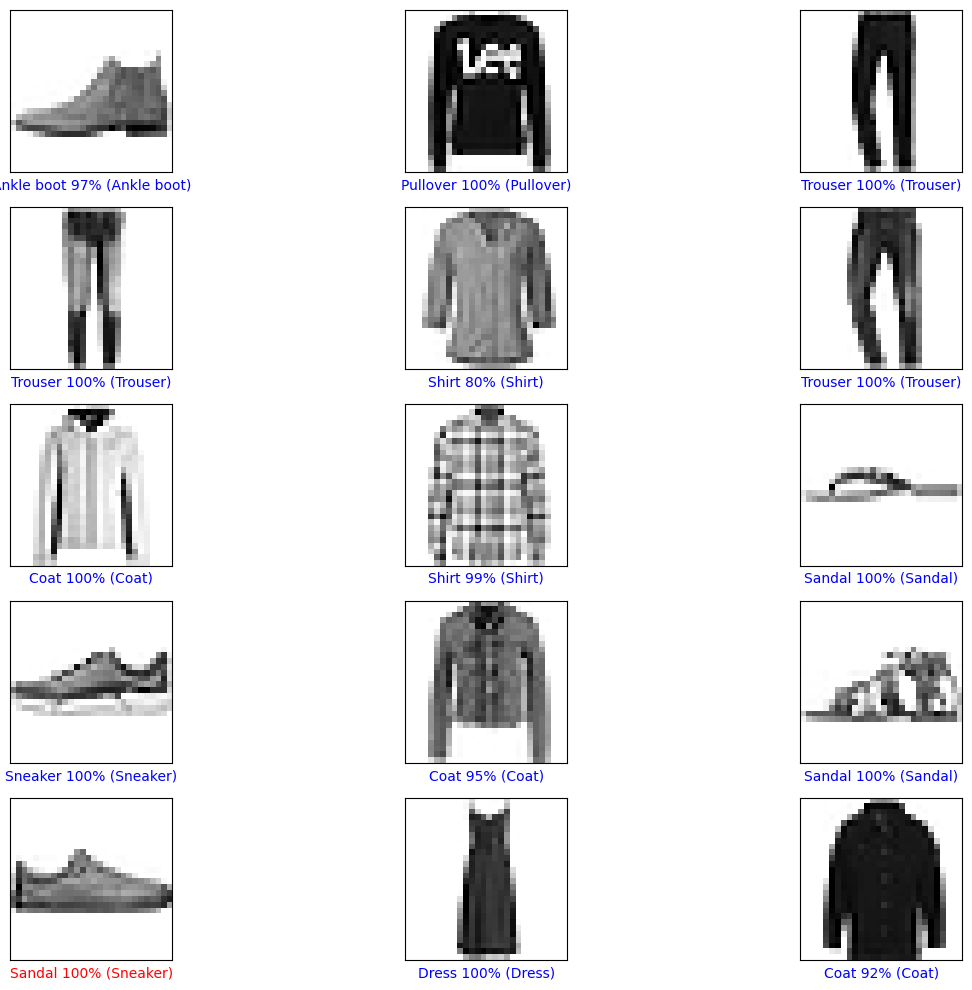

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Function to create and compile MLP models with different configurations
def create_mlp_model(hidden_layers=1, units_per_layer=128, activation='relu'):
    model = keras.Sequential()

    # Input layer (flatten the 28x28 images)
    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    # Add hidden layers
    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(units_per_layer, activation=activation))

    # Output layer (10 classes)
    model.add(keras.layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Experiment with different configurations
configurations = [
    {'hidden_layers': 1, 'units_per_layer': 128, 'activation': 'relu'},
    {'hidden_layers': 2, 'units_per_layer': 128, 'activation': 'relu'},
    {'hidden_layers': 1, 'units_per_layer': 256, 'activation': 'relu'},
    {'hidden_layers': 2, 'units_per_layer': 64, 'activation': 'sigmoid'},
    {'hidden_layers': 3, 'units_per_layer': 128, 'activation': 'tanh'},
]

# Train and evaluate each configuration
history_dict = {}
for config in configurations:
    print(f"\nTraining model with configuration: {config}")
    model = create_mlp_model(**config)
    history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels),
                        verbose=1)
    history_dict[str(config)] = history

# Plot training and validation accuracy for each configuration
plt.figure(figsize=(12, 8))
for config, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=config)

plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Evaluate the best performing model on test set
best_config = max(history_dict.items(), key=lambda x: max(x[1].history['val_accuracy']))
print(f"\nBest configuration: {best_config[0]}")
best_model = create_mlp_model(**eval(best_config[0]))
best_model.fit(train_images, train_labels, epochs=10)  # Train on full data
test_loss, test_acc = best_model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Make predictions
predictions = best_model.predict(test_images)

# Example prediction visualization
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Plot the first X test images, their predicted labels, and the true labels
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()